このプログラムでは磁気感受率の虚部の概形を表示します．

In [1]:
from numpy import *
from math import *
import pandas as pd
import matplotlib.pyplot as plt 
import sys
sys.path.append('..')
from package import Chi1xx,Chi1xy,param86Kp,param86Km,xrange

複素感受率のプロット

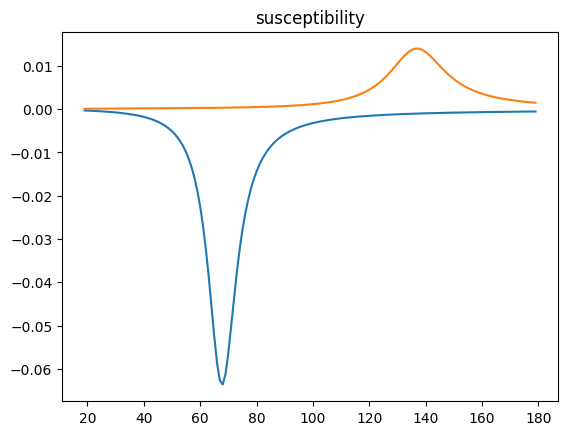

In [2]:
Lorentz = pd.read_csv('../data/86K_Lorentz.csv',sep = ' ')
paramp = param86Kp()
paramm = param86Km()
#平岡さん図7.27にあるようにdampingの符号の取り方でスペクトルの形状が変化する．
Chi1p = [(Chi1xx(2*pi*f*10**9,*paramp)+ 1j*Chi1xy(2*pi*f*10**9,*paramp)).imag for f in Lorentz['x']]
Chi1m = [(Chi1xx(2*pi*f*10**9,*paramm)- 1j*Chi1xy(2*pi*f*10**9,*paramm)).imag for f in Lorentz['x']]
data = {'x':Lorentz['x'],'1p':Chi1p,'1m':Chi1m} #副格子1の右回り+と左回り-の磁気感受率の虚部
sus_imag = pd.DataFrame(data)
fig1, ax1 = plt.subplots()
ax1.set_title('susceptibility')
ax1.plot(sus_imag['x'],sus_imag['1p'])
ax1.plot(sus_imag['x'],sus_imag['1m'])


In [3]:
Lorentz = pd.read_csv('../data/86K_Lorentz.csv',sep = ' ')
#fig2, ax2 = plt.subplots()
#ax2.set_title('Lorentz')
#ax2.plot(Lorentz['x'],Lorentz['L1'])
#ax2.plot(Lorentz['x'],Lorentz['L2'])

ピーク強度に合わせるためにかけた係数
plus:-4970.860858901734  minus:12610.852748406527


0       19
1       20
2       21
3       22
4       23
      ... 
156    175
157    176
158    177
159    178
160    179
Name: x, Length: 161, dtype: int64

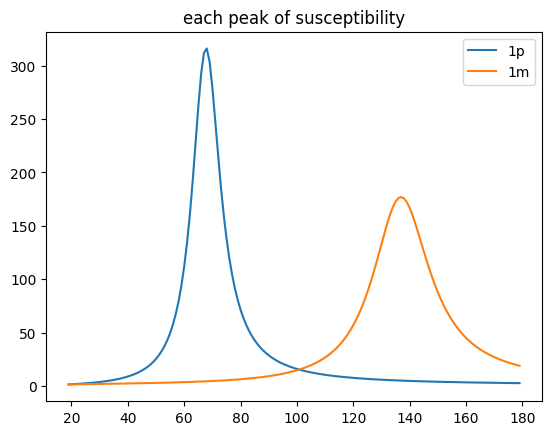

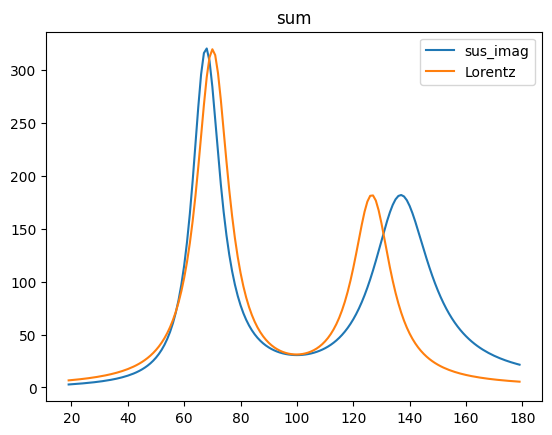

In [4]:
#磁気感受率の虚部とローレンツ関数のpeak位置を調節
peak_ratio1 = Lorentz['L1'].max()/sus_imag['1p'].min()
peak_ratio2 = Lorentz['L2'].max()/sus_imag['1m'].max()
print(f"ピーク強度に合わせるためにかけた係数\nplus:{peak_ratio1}  minus:{peak_ratio2}")
sus_imag['1p'] = sus_imag['1p']*peak_ratio1
sus_imag['1m'] = sus_imag['1m']*peak_ratio2
##sus_imagのグラフを描写
fig3, ax3 = plt.subplots()
ax3.set_title('each peak of susceptibility')
fig4, ax4 = plt.subplots()
ax4.set_title('sum')
ax3.plot(sus_imag['x'],sus_imag['1p'],label="1p")
ax3.plot(sus_imag['x'],sus_imag['1m'],label="1m")
ax3.legend()
#ax3.plot(Lorentz['x'],Lorentz['L1'])
#ax3.plot(Lorentz['x'],Lorentz['L2'])
ax4.plot(sus_imag['x'],sus_imag['1p']+sus_imag['1m'],label = "sus_imag")
ax4.plot(Lorentz['x'],Lorentz['Lsum'],label = "Lorentz")
ax4.legend()